<a href="https://colab.research.google.com/github/subarnop/UdacityBlog/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_json('/content/drive/My Drive/Olx_EDA/input/train.json')
test = pd.read_json('/content/drive/My Drive/Olx_EDA/input/test.json')

In [ ]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [ ]:
train.count()

bathrooms          49352
bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
interest_level     49352
dtype: int64

In [ ]:
ord_enc = OrdinalEncoder()
train["interest_level"] = ord_enc.fit_transform(train[["interest_level"]])

In [ ]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,interest_level
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04,49352.000000
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03,1.149741
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04,0.531884
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01,0.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03,1.000000
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03,1.000000
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03,1.000000
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06,2.000000


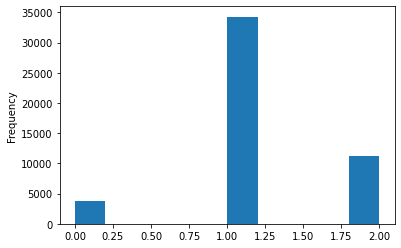

In [ ]:
train['interest_level'].plot.hist()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 6.0+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [ ]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [ ]:
test.bathrooms.value_counts()

1.0      59664
2.0      11570
3.0       1116
1.5        997
0.0        474
2.5        425
4.0        205
3.5         94
4.5         54
5.0         40
6.0          7
5.5          7
20.0         2
6.5          2
112.0        1
7.5          1
Name: bathrooms, dtype: int64

In [ ]:
test.bedrooms.value_counts()

1    23856
2    22491
0    14089
3    10873
4     2958
5      322
6       66
7        4
Name: bedrooms, dtype: int64

In [ ]:
train[train.bedrooms>0]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [ ]:
train = train[train.bathrooms != 0]
train = train[train.bedrooms != 0]

In [ ]:
_column = train['bedrooms']/train['bathrooms']
train.insert(2, 'BD/BT', _column)

In [ ]:
train.corr()

,bathrooms,bedrooms,BD/BT,latitude,listing_id,longitude,price,interest_level
bathrooms,1.000000,0.544742,-0.204357,-0.009222,0.000475,0.009749,0.066378,-0.023154
bedrooms,0.544742,1.000000,0.673316,-0.002883,0.013569,0.003741,0.043451,0.030091
BD/BT,-0.204357,0.673316,1.000000,0.001629,0.015120,-0.000950,-0.001287,0.048188
latitude,-0.009222,-0.002883,0.001629,1.000000,0.000039,-0.967192,-0.000546,0.001221
listing_id,0.000475,0.013569,0.015120,0.000039,1.000000,-0.000067,0.009128,-0.010130
longitude,0.009749,0.003741,-0.000950,-0.967192,-0.000067,1.000000,-0.000184,-0.002209
price,0.066378,0.043451,-0.001287,-0.000546,0.009128,-0.000184,1.000000,-0.006364
interest_level,-0.023154,0.030091,0.048188,0.001221,-0.010130,-0.002209,-0.006364,1.000000


In [ ]:
pd.DataFrame(train.manager_id.value_counts()).reset_index().rename(columns={"index": "manager_id", "manager_id": "count"})["count"].value_counts()

1       943
2       433
3       245
4       197
5       159
       ... 
166       1
180       1
250       1
260       1
1981      1
Name: count, Length: 126, dtype: int64

In [ ]:
train["display_address"] = ord_enc.fit_transform(train[["display_address"]])

In [ ]:
features = []
train.features.apply(lambda x: features.extend(x))
features_df = pd.DataFrame(pd.Series(features).value_counts()).reset_index().rename(columns={"index": "words", 0:"count"})
feat = features_df[features_df["count"] > 1000].words.unique().tolist()
features_df

,words,count
0,Elevator,20399
1,Hardwood Floors,19389
2,Cats Allowed,19089
3,Dogs Allowed,17885
4,Dishwasher,17351
...,...,...
1357,Laundry on floor,1
1358,Large Closets,1
1359,GREAT SHARE,1
1360,FREE HEALTH CLUB,1


In [ ]:
train.features = train.features.apply(lambda x: [val for val in x if val in feat])

In [ ]:
train.features

4         [Dining Room, Pre-War, Laundry in Building, Di...
6         [Doorman, Elevator, Laundry in Building, Dishw...
9         [Doorman, Elevator, Laundry in Building, Laund...
10                                                       []
16        [Doorman, Elevator, Dishwasher, Hardwood Floor...
                                ...                        
124000              [Elevator, Dishwasher, Hardwood Floors]
124002    [Common Outdoor Space, Cats Allowed, Dogs Allo...
124004    [Dining Room, Elevator, Pre-War, Laundry in Bu...
124008    [Pre-War, Laundry in Unit, Dishwasher, No Fee,...
124009    [Dining Room, Elevator, Laundry in Building, D...
Name: features, Length: 39721, dtype: object

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

train = train.join( pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(train.pop('features')), index=train.index, columns=mlb.classes_))

In [ ]:
# description_length  
train['description'] = train.description.apply(lambda x: len(x.split()))

In [ ]:
import datetime
today = datetime.date.today()
#train['created'].iloc[0].split('-')[2].split(' ')[0]
train['created'] = train.created.apply(lambda x: (today - datetime.date(int(x.split('-')[0]), int(x.split('-')[1]), int(x.split('-')[2].split(' ')[0]))).days )
train['created'] = train['created'] - train.created.min()

In [ ]:
train['listing_id'] = (train['listing_id'] - train.listing_id.min())

In [ ]:
train['building_id'] = ord_enc.fit_transform(train[['building_id']])

In [ ]:
train.head()

,bathrooms,bedrooms,BD/BT,building_id,created,description,display_address,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access
4,1.0,1,1.0,3541.0,13,75,754.0,40.7108,358368,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,2.0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
6,1.0,2,2.0,4920.0,28,129,4945.0,40.7513,280387,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
9,1.0,2,2.0,5464.0,15,117,4968.0,40.7575,346720,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,2.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
10,1.5,3,2.0,2184.0,5,93,5690.0,40.7145,399255,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,1.0,3,3.0,1250.0,1,128,4851.0,40.7348,414730,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
len(train.building_id.unique())

6795

In [ ]:
train.corr()

,bathrooms,bedrooms,BD/BT,building_id,created,description,display_address,latitude,listing_id,longitude,price,interest_level,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access
bathrooms,1.000000,0.544742,-0.204357,0.024561,-0.003044,0.142227,0.000641,-0.009222,0.000475,0.009749,0.066378,-0.023154,0.147738,0.010103,-0.003455,0.242977,0.164191,0.013719,0.204401,0.164653,0.011143,0.169449,0.101512,0.087139,0.098778,-0.017166,0.135903,0.219712,0.073277,0.124429,0.168689,-0.026362,0.111862,0.122069,0.156408,0.082828
bedrooms,0.544742,1.000000,0.673316,0.029838,-0.014439,0.099943,-0.013789,-0.002883,0.013569,0.003741,0.043451,0.030091,0.101973,-0.026596,0.015738,0.186001,0.141811,-0.023832,0.005640,0.022121,-0.028954,0.027046,0.078204,0.105665,0.085025,0.022476,0.073879,0.137769,0.005924,0.164527,0.138238,-0.003106,0.061183,0.030863,0.106237,0.017815
BD/BT,-0.204357,0.673316,1.000000,0.009874,-0.013633,-0.000842,-0.009700,0.001629,0.015120,-0.000950,-0.001287,0.048188,-0.013070,-0.038335,0.026724,0.002468,0.011900,-0.037441,-0.159722,-0.113605,-0.037007,-0.110464,-0.002870,0.035490,0.005933,0.044827,-0.038037,-0.025637,-0.053062,0.076155,0.007342,0.011812,-0.029432,-0.068327,-0.009264,-0.042334
building_id,0.024561,0.029838,0.009874,1.000000,-0.005030,0.047725,-0.061883,-0.003388,0.006886,-0.001439,0.005839,0.069449,0.074777,-0.039837,-0.003412,0.068075,0.160231,-0.043884,0.106210,0.185857,-0.014331,0.092432,0.048088,0.157183,0.099148,0.003427,0.126153,0.079859,0.066315,0.085126,0.090467,-0.115493,0.106923,0.030151,0.064645,0.024533
created,-0.003044,-0.014439,-0.013633,-0.005030,1.000000,0.024114,0.003935,0.000093,-0.966531,-0.000250,-0.009562,0.006285,-0.000735,-0.005318,0.019476,-0.000875,0.012655,-0.005818,0.010583,0.010898,-0.013924,-0.002785,0.000571,0.012074,0.005305,0.022485,0.011137,-0.001396,0.000465,0.013501,0.008125,-0.008773,0.005359,0.002668,0.007591,0.012703
description,0.142227,0.099943,-0.000842,0.047725,0.024114,1.000000,-0.025542,-0.005756,-0.026865,0.001552,0.004731,0.053241,0.120631,0.035035,0.049669,0.178220,0.307830,0.042825,0.247851,0.201565,-0.023378,0.232069,0.108808,0.270792,0.198351,0.018511,0.286282,0.250230,0.187949,0.300138,0.208531,0.024182,0.215984,0.139179,0.123765,0.111330
display_address,0.000641,-0.013789,-0.009700,-0.061883,0.003935,-0.025542,1.000000,0.020605,-0.006107,-0.016413,0.011144,-0.000901,0.011691,0.039143,-0.037486,0.006964,0.068926,0.050583,0.153076,0.081142,-0.192687,0.122419,0.001555,0.057405,0.051971,-0.063856,0.088670,0.066353,0.063820,0.011932,0.027138,0.090158,0.066238,0.083402,0.022473,0.025435
latitude,-0.009222,-0.002883,0.001629,-0.003388,0.000093,-0.005756,0.020605,1.000000,0.000039,-0.967192,-0.000546,0.001221,0.005132,-0.008869,-0.004139,0.007159,0.010116,-0.006835,0.002748,0.008056,-0.007881,-0.005203,-0.004363,0.016439,0.003578,-0.005178,0.002479,-0.017195,0.000416,-0.007642,0.000687,0.009447,-0.006005,0.005361,-0.001854,-0.000883
listing_id,0.000475,0.013569,0.015120,0.006886,-0.966531,-0.026865,-0.006107,0.000039,1.000000,-0.000067,0.009128,-0.010130,-0.002906,0.001649,0.003073,-0.003971,-0.019309,0.002209,-0.012164,-0.010181,0.013246,0.004747,-0.002269,-0.019661,-0.008146,-0.000055,-0.019285,-0.004650,-0.003899,-0.017089,-0.011628,0.000368,-0.007801,-0.005226,-0.009346,-0.014958
longitude,0.009749,0.003741,-0.000950,-0.001439,-0.000250,0.001552,-0.016413,-0.967192,-0.000067,1.000000,-0.000184,-0.002209,-0.005195,0.008412,-0.004792,-0.006641,-0.015439,0.006102,-0.011401,-0.013623,0.005013,-0.005579,0.003300,-0.020990,-0.007866,0.002303,-0.005054,0.011395,-0.006271,0.001032,-0.002748,-0.007568,-0.001347,-0.005591,0.000076,-0.004143


In [ ]:
train.head()

,bathrooms,bedrooms,BD/BT,building_id,created,description,display_address,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access
4,1.0,1,1.0,3541.0,13,75,754.0,40.7108,358368,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,2.0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
6,1.0,2,2.0,4920.0,28,129,4945.0,40.7513,280387,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
9,1.0,2,2.0,5464.0,15,117,4968.0,40.7575,346720,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,2.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
10,1.5,3,2.0,2184.0,5,93,5690.0,40.7145,399255,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,1.0,3,3.0,1250.0,1,128,4851.0,40.7348,414730,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,1.0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['listing_id','price']] = scaler.fit_transform(train[['listing_id','price']])

In [ ]:
X = train.drop(['manager_id', 'photos', 'street_address', 'interest_level'], axis = 1)
y = train['interest_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, random_state = 42)
rf.fit(X_train, y_train)

print("Train score:", rf.score(X_train, y_train))
print("Test score:", rf.score(X_test, y_test))

Train score: 0.8623619269456004
Test score: 0.03549287904123


In [ ]:
train_ = train[train['interest_level']==0].head(5000)
train_ .append(train[train['interest_level']==1].head(5000))
train_ .append(train[train['interest_level']==2].head(5000))

X = train_.drop(['manager_id', 'photos', 'street_address', 'interest_level', 'price'], axis = 1)
y = train_['interest_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf = RandomForestRegressor(n_estimators = 100, n_jobs = -1, oob_score = True, bootstrap = True, random_state = 42)
rf.fit(X_train, y_train)

print("Train score:", rf.score(X_train, y_train))
print("Test score:", rf.score(X_test, y_test))

Train score: 1.0
Test score: 1.0
